# ML-Agents: Banana Collector 
Double DQN

## Installation

In [1]:
!git clone https://github.com/Unity-Technologies/ml-agents.git
!git -C ml-agents checkout 0.4.0b

!sudo pip3 install ml-agents/python/.

!pip install grpcio
!pip install seaborn
!pip install tqdm 

Cloning into 'ml-agents'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 11035 (delta 83), reused 103 (delta 56), pack-reused 10868
Receiving objects: 100% (11035/11035), 113.67 MiB | 50.90 MiB/s, done.
Resolving deltas: 100% (7214/7214), done.
Checking connectivity... done.
Note: checking out '0.4.0b'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 1ead1cc... Merge pull request #1002 from Unity-Technologies/hotfix-0.4b
The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current

    100% |████████████████████████████████| 327kB 42.8MB/s ta 0:00:01
    100% |████████████████████████████████| 890kB 34.4MB/s ta 0:00:01
  Running setup.py install for gast ... done
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Running setup.py install for html5lib ... done
  Found existing installation: bleach 2.1.4
    Uninstalling bleach-2.1.4:
      Successfully uninstalled bleach-2.1.4
  Running setup.py install for termcolor ... done
  Running setup.py install for absl-py ... done
  Running setup.py install for docopt ... done
  Running setup.py install for unityagents ... done
    100% |████████████████████████████████| 9.5MB 6.0MB/s eta 0:00:01
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 215kB 13.0MB/s ta 0:00:01


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 51kB 10.9MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip
!unzip Banana_Linux_NoVis.zip
!mv Banana_Linux_NoVis/ data/
!rm Banana_Linux_NoVis.zip

--2018-10-02 23:24:29--  https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.137
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47031454 (45M) [application/zip]
Saving to: ‘Banana_Linux_NoVis.zip’

Banana_Linux_NoVis. 100%[===================>]  44.85M  14.1MB/s    in 3.2s    

2018-10-02 23:24:33 (14.1 MB/s) - ‘Banana_Linux_NoVis.zip’ saved [47031454/47031454]

Archive:  Banana_Linux_NoVis.zip
   creating: Banana_Linux_NoVis/
  inflating: Banana_Linux_NoVis/Banana.x86  
   creating: Banana_Linux_NoVis/Banana_Data/
   creating: Banana_Linux_NoVis/Banana_Data/Managed/
  inflating: Banana_Linux_NoVis/Banana_Data/Managed/UnityEngine.AudioModule.dll.mdb  
  inflating: Banana_Linux_NoVis/Banana_Data/Managed/UnityEngine.InputModule.dll.mdb  
  inflating: Banana_Linux_NoVis/Ba

  inflating: Banana_Linux_NoVis/Banana_Data/GI/level0/d8/d879d8f84dad702b137146d9028aad2c.iws.sse  
  inflating: Banana_Linux_NoVis/Banana_Data/GI/level0/d8/d879d8f84dad702b137146d9028aad2c.caw  
  inflating: Banana_Linux_NoVis/Banana_Data/GI/level0/d8/d879d8f84dad702b137146d9028aad2c.ecm  
  inflating: Banana_Linux_NoVis/Banana_Data/GI/level0/d8/d879d8f84dad702b137146d9028aad2c.rsc.sse  
  inflating: Banana_Linux_NoVis/Banana_Data/GI/level0/d8/d879d8f84dad702b137146d9028aad2c.rgb  
   creating: Banana_Linux_NoVis/Banana_Data/Plugins/
   creating: Banana_Linux_NoVis/Banana_Data/Plugins/x86/
  inflating: Banana_Linux_NoVis/Banana_Data/Plugins/x86/libgrpc_csharp_ext.x86.so  
   creating: Banana_Linux_NoVis/Banana_Data/Plugins/x86_64/
  inflating: Banana_Linux_NoVis/Banana_Data/Plugins/x86_64/libgrpc_csharp_ext.x64.so  
  inflating: Banana_Linux_NoVis/Banana_Data/boot.config  
   creating: Banana_Linux_NoVis/Banana_Data/Resources/
  inflating: Banana_Linux_NoVis/Banana_Data/Resources/unit

## Setup

In [1]:
import sys 
sys.path.append("ml-agents/python")
import numpy as np
from unityagents import UnityEnvironment
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook
from IPython.display import FileLink, FileLinks

%load_ext autoreload
%autoreload 2
%matplotlib inline 

#from badaii.rl.agents.double_dqn import Agent
from badaii import helpers

## Environment

In [2]:
env = UnityEnvironment(file_name="data/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

## Helpers

In [4]:
def reset_env(env, brain_name):
    env_info = env.reset(train_mode=True)[brain_name]
    return env_info.vector_observations[0]

In [5]:
def step_env(env, action, brain_name):
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0] 
    done = env_info.local_done[0]  
    return (next_state, reward, done)

In [6]:
def init_replay_memory(agent, env, action_size, brain_name, size=50000):
    state = reset_env(env, brain_name)
    it = 0
    while it < size:
        action = np.random.randint(action_size)
        next_state, reward, done = step_env(env,action,brain_name)
        agent.step(state, action, reward, next_state, done, train=False)
        
        it+=1 
        if done:
            state = reset_env(env, brain_name)
        else:
            state = next_state

In [7]:
def train(agent, scores, env, brain_name, episodes, steps, replay_start_size, 
          inital_eps, final_eps, final_exp_ep,
          print_every=10, out_file='model_v1.ckpt'):
    #init_replay_memory(agent, env, replay_start_size)
    
    eps = initial_eps
    last_saved = 0 
    it = 0

    with tnrange(episodes) as t: 
        for ep_i in t: 
            state = reset_env(env, brain_name)
            score = 0
            for step_i in range(steps):
                action = agent.act(state, epsilon=eps)
                next_state, reward, done = step_env(env,action,brain_name)
                score += reward
                agent.step(state, action, reward, next_state, done)
                it += 1 
                state = next_state
                if done:
                    break
                
            eps = max(final_eps,initial_eps-(initial_eps-final_eps)/final_exp_ep*ep_i) 
            scores.add(score)
        
            if (ep_i+1) % print_every == 0:
                #clear_output(wait=True)
                #print(f'Episode {ep_i+1}/{episodes}, Iteration: {it}, Epsilon={eps:.4f}, Score={scores.last:.2f}')
                t.set_postfix(epsilon=eps, score=scores.last)
        
            if scores.last >= 13.0 and scores.last > last_saved:
                last_saved = scores.last
                print('Saving...')
                agent.save(out_file)

In [8]:
def hyper_search(scores, env, brain_name, 
                 lrates, 
                 final_exp_eps, 
                 taus, 
                 final_epsilons, 
                 gammas,
                 episodes=500, 
                 iterations=10):
    env_info = env.reset(train_mode=True)[brain_name]
    action_size = brain.vector_action_space_size
    state = env_info.vector_observations[0]
    state_size = len(state)
    
    for it in range(iterations):
        lrate = lrates[np.random.randint(len(lrates))]
        final_exp_ep = final_exp_eps[np.random.randint(len(final_exp_eps))]
        tau = taus[np.random.randint(len(taus))] 
        final_eps = final_epsilons[np.random.randint(len(final_epsilons))] 
        gamma = gammas[np.random.randint(len(gammas))] 
        
        agent = Agent(
            state_size, 
            action_size, 
            seed=0, 
            replay_size=replay_size,
            tau = tau,
            lrate = lrate, 
            gamma = gamma
        )
        
        score = helpers.MovingResult(100, params = agent.params, name='score')
        score.params.add('final_exp_ep', final_exp_ep) 
        score.params.add('final_eps', final_eps)
        scores.append(score)
        
        print(f'-- Iteration {it+1}/{iterations} --')
        print(f'{score.params}')
        
        train(
            agent, 
            score, 
            env, 
            brain_name,
            episodes, 
            steps, 
            replay_start_size, 
            initial_eps, final_eps, 
            final_exp_ep
        )

In [9]:
def plot_scores(scores):
    plt.figure(figsize=(10,5), dpi=80)
    
    for i in range(len(scores)):
        print(f'Test #{i+1}: {scores[i].params}')
        x_moving, y_moving = zip(*scores[i].buffer_moving)
        plt.plot(list(x_moving), list(y_moving), label=f'Test #{i+1}')
        
    plt.legend()
    plt.xlabel('Episode #')
    plt.ylabel(f'Moving Score (100)')
    plt.show()

In [10]:
def calculate_score(env, brain_name, agent):
    scores = np.zeros(100)
    for ep_i in range(scores.shape[0]):
        state = reset_env(env, brain_name)
        score = 0
        while True:
            action = agent.act(state)
            next_state, reward, done = step_env(env,action,brain_name)
            score += reward
            state = next_state
            if done: 
                scores[ep_i] = score
                break    
    return scores.mean()

## Agent

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

from badaii.rl.agents.replay_buffer import ReplayBuffer
from badaii.moving_result import MovingResult

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, layers, seed=None):
        super(QNetwork, self).__init__()
        torch.manual_seed(seed)
        ls = [nn.Linear(state_size, layers[0])]
        ls.extend([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)])
        ls.append(nn.Linear(layers[-1], action_size))
        
        self.layers = nn.ModuleList(ls)
        self.bns = nn.ModuleList([nn.BatchNorm1d(l) for l in layers])
        
    def forward(self, x):
        for i, l in enumerate(self.layers[:-1]):
            x = self.bns[i](F.relu(l(x)))
        x = self.layers[-1](x)
        return x

class Agent():
    """Double DQN Agent with epsilon-greedy policy 
    
    Parameters
    ----------
    state_size: int 
        Size of the observation space
    action_size: int
        Number of discrete actions
    seed: int 
        Number for random seeding
    replay_size: int
        Size of the experience replay buffer
    batch_size: int
        Size of the batch used when learning
    gamma: float
        Discount rate
    lrate: int or float
        Learning rate 
    tau: float
        Soft target update rate
    """
    def __init__(self, state_size=None, action_size=None, seed=None,
                 replay_size = 100000, batch_size=64, 
                 gamma=0.99, lrate=5e-4, tau=0.001, update_every = 4, 
                 hidden_layers = [250, 500, 250],
                 restore=None):

        if restore is not None:
            checkpoint = torch.load(restore, map_location={'cuda:0': 'cpu'})

        self.seed = seed if not restore else checkpoint['seed']
        self.action_size = action_size if not restore else checkpoint['action_size']
        self.state_size = state_size if not restore else checkpoint['state_size']
        self.replay_size = replay_size if not restore else checkpoint['replay_size']
        self.batch_size = batch_size if not restore else checkpoint['batch_size']
        self.gamma = gamma if not restore else checkpoint['gamma']
        self.lrate = lrate if not restore else checkpoint['lrate']
        self.tau = tau if not restore else checkpoint['tau']
        self.update_every = update_every if not restore else checkpoint['update_every']
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.hidden_layers = hidden_layers if not restore else checkpoint['hidden_layers']
        
        self.q_network = QNetwork(
            self.state_size, 
            self.action_size, 
            self.hidden_layers, 
            self.seed
        ).to(self.device)

        self.q_network_target = QNetwork(
            self.state_size, 
            self.action_size, 
            self.hidden_layers, 
            self.seed
        ).to(self.device)
        
        if restore is not None:
            self.q_network.load_state_dict(checkpoint['state_dict'])
            self.q_network_target.load_state_dict(checkpoint['state_dict'])

        self.optimizer = optim.Adam(self.q_network.parameters(), lr=self.lrate)
        
        self.reset()
        
    def save(self, filename):
        checkpoint = self.params
        checkpoint['state_dict'] = self.q_network.state_dict()
        torch.save(checkpoint, filename)
        
    def reset(self):
        self.it = 0
        self.memory = ReplayBuffer(
            self.action_size, self.replay_size, 
            self.update_every * self.batch_size, 
            self.seed, self.device
        )
        self.losses = MovingResult(100, name='loss', save_raw=False)
    
    def step(self, state, action, reward, next_state, done, train=True):
        self.memory.add(state, action, reward, next_state, done)
        self.it += 1 
        if train and self.it % self.update_every and len(self.memory) > self.memory.batch_size:
            experiences = self.memory.sample()
            self.learn(experiences)
    
    def act(self, state, epsilon=0.):
        """ Epsilon-Greedy policy
        
        """
        probs = epsilon * np.ones(self.action_size) / self.action_size
        state = torch.from_numpy(state).float().to(self.device)
        
        self.q_network.eval()
        with torch.no_grad():
            probs[np.argmax(self.q_network(state.reshape(1,-1)).cpu().numpy())] += 1-epsilon
        self.q_network.train()
        
        return np.random.choice(np.arange(self.action_size), p=probs)
    
    def learn(self, experiences):
        states, actions, rewards, next_states, dones = experiences
        # argmax_a Q^(next_state,a, w)
        with torch.no_grad():
            _ , best_actions = self.q_network(next_states).max(dim=1)
            # y^ = td_target
            # y^ = reward + gamma * Q^(next_state,argmax_a(next_state,a, w), w-), episode not terminal
            # y^ = reward, episode terminal
            td_targets = rewards + self.gamma * torch.gather(self.q_network_target(next_states),1,best_actions.view(-1,1))
            for i in range(self.memory.batch_size):
                if dones[i].item() == 1.0:
                    td_targets[i] = rewards[i]   
        
        # delta = y^-Q
        # clamp btwn -1..1
        delta = torch.clamp(td_targets-torch.gather(self.q_network(states),1,actions), -1., 1.)
        # loss = sum (y^-Q)^2
        loss = torch.sum(torch.pow(delta,2))
        self.losses.add(loss.item()/self.memory.batch_size)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.soft_update()
            
    def soft_update(self):
        """Soft update of target network
        θ_target = τ*θ_local + (1 - τ)*θ_target
        """
        for target_param, param in zip(self.q_network_target.parameters(), self.q_network.parameters()):
            target_param.data.copy_(self.tau*param.data+(1-self.tau)*target_param.data)
            
    @property
    def params(self):
        params = {
            'state_size': self.state_size,
            'action_size': self.action_size,
            'seed': self.seed,
            'replay_size': self.replay_size,
            'batch_size': self.batch_size,
            'gamma': self.gamma, 
            'lrate': self.lrate,
            'tau': self.tau,
            'update_every': self.update_every,
            'hidden_layers': self.hidden_layers
        }
        return params
    
    @property 
    def trainable_params(self):
        return sum([np.prod(p.size()) for p in self.q_network.parameters()])

## Train

In [12]:
final_exp_ep = 500

# 1.0 -> 0.1
initial_eps = 1.0
final_eps = 0.01 

episodes = 1000
steps = 2000
replay_start_size = 5000
replay_size = 100000
tau = 0.05 
lrate = 5.0e-5
update_every = 4
batch_size = 32
hidden_layers = [100, 200, 100]

print_every = 10

In [13]:
agent = Agent(
    state_size, 
    action_size, 
    seed=0, 
    replay_size=replay_size,
    tau = tau,
    lrate = lrate,
    batch_size = batch_size,
    update_every = update_every,
    hidden_layers = hidden_layers
)

scores = helpers.MovingResult(100, name='score', save_raw=False)

scores_agent = train(
    agent, 
    scores, 
    env, 
    brain_name,
    episodes, 
    steps, 
    replay_start_size, 
    initial_eps, final_eps, 
    final_exp_ep,
    out_file='model_v1.ckpt',
    print_every = print_every
)

Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...
Saving...



In [16]:
FileLink('model_v1.ckpt')

/home/ubuntu/banana-collector/model_v1.ckpt

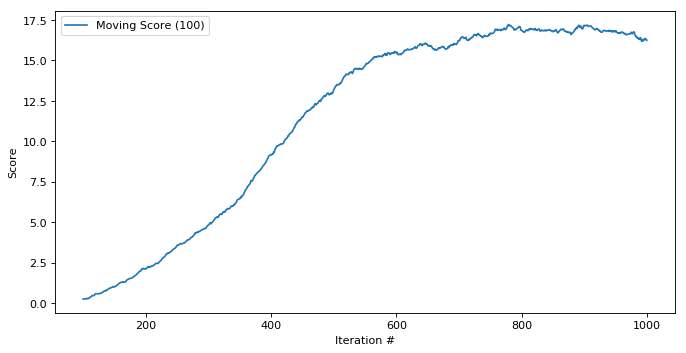

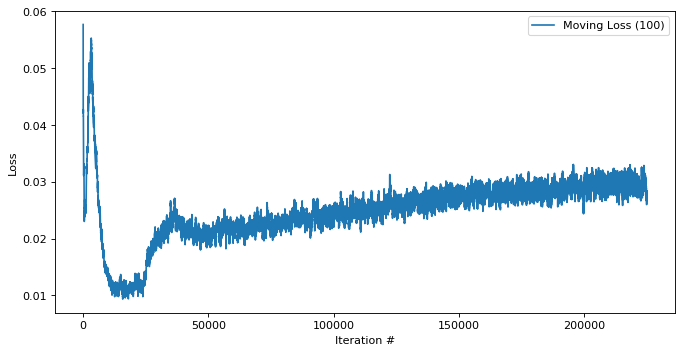

In [14]:
scores.plot()
agent.losses.plot()

## Results

c3.large = 5.50sec/it <br>
p2.xlarge = 3.15sec/it <br>

### 1.0
Final Score: 12.59<br><br>
Episodes: 1000<br>
Epsilon: 1.0 -> 0.1, 500 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.01<br>
Learning Rate: 1.0E-4<br>
Update Every: 1<br>
Batch Size: 64<br>

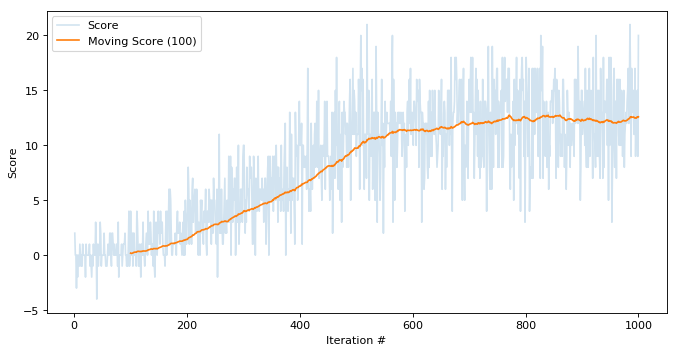

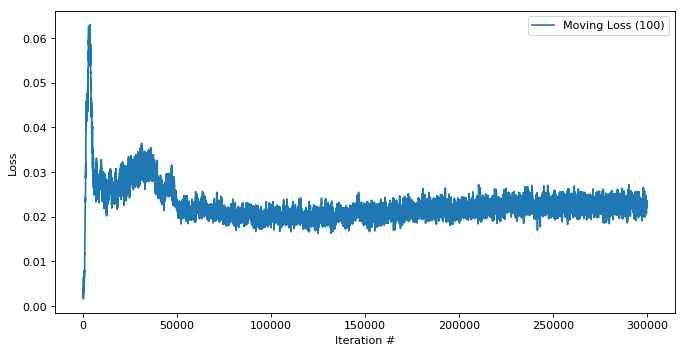

In [49]:
scores.plot()
agent.losses.plot()

### 2.0
Final Score: 15.3<br><br>
Episodes: 1000<br>
Epsilon: 1.0 -> 0.01, 500 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.05<br>
Learning Rate: 5.0E-5<br>
Update Every: 4<br>
Batch Size: 32<br>

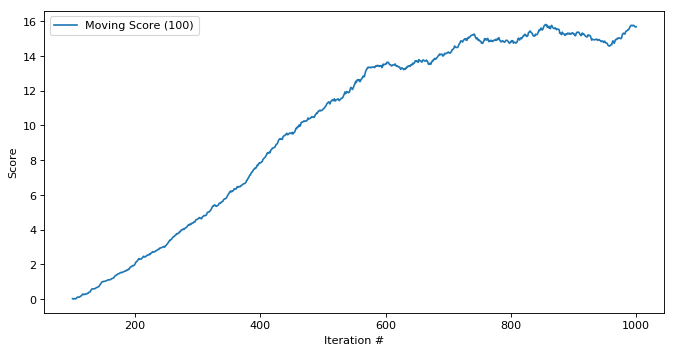

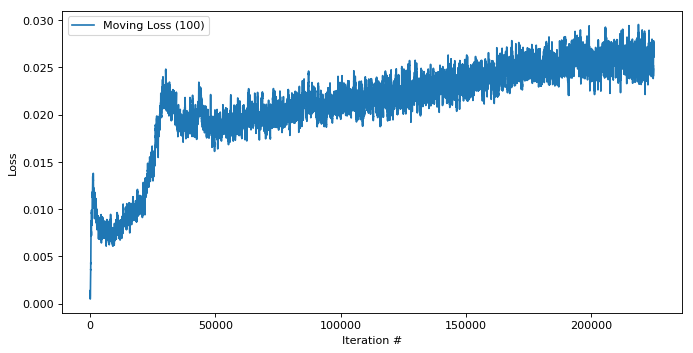

In [12]:
scores.plot()
agent.losses.plot()

### 3.0
** Same as 2.0 but with batch norm added ** <br>

Final Score: 16.5 <br><br>
Episodes: 1000<br>
Epsilon: 1.0 -> 0.01, 500 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.05<br>
Learning Rate: 5.0E-5<br>
Update Every: 4<br>
Batch Size: 32<br>

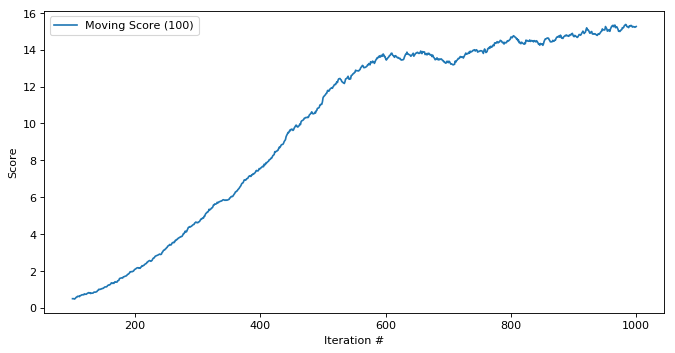

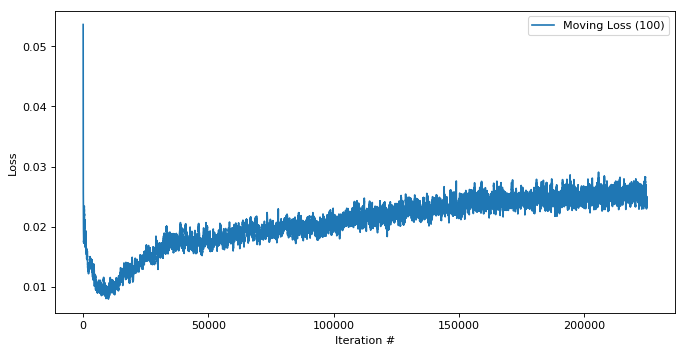

In [14]:
scores.plot()
agent.losses.plot()

### 4.0
** Same as 3.0 but with network 100, 200, 100 ** <br>

Final Score: 17.5 <br><br>
Episodes: 1000<br>
Epsilon: 1.0 -> 0.01, 500 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.05<br>
Learning Rate: 5.0E-5<br>
Update Every: 4<br>
Batch Size: 32<br>

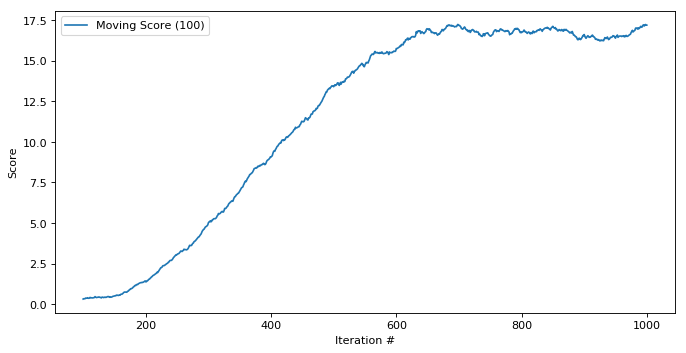

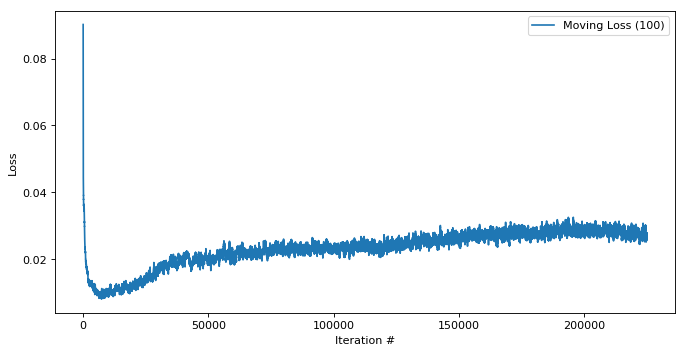

In [18]:
scores.plot()
agent.losses.plot()

### 5.0
** Same as 4.0 but with exploration stop at 750 ** <br>

Final Score: <br><br>
Episodes: 1500<br>
Epsilon: 1.0 -> 0.01, 750 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.05<br>
Learning Rate: 5.0E-5<br>
Update Every: 4<br>
Batch Size: 32<br>

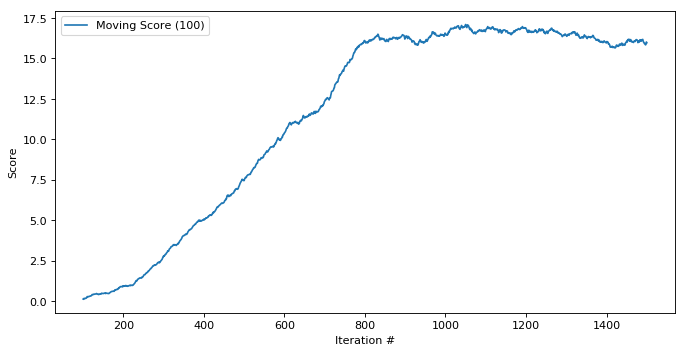

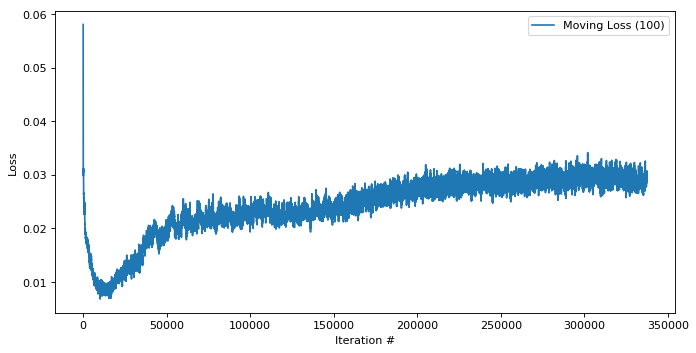

In [16]:
scores.plot()
agent.losses.plot()

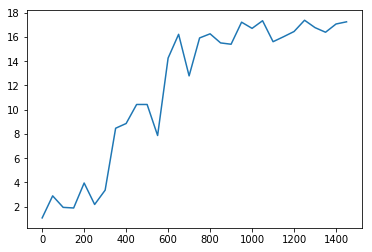

In [24]:
plt.plot(np.arange(0, 1500, 50), scores_agent)

### 6.0
** 500, 1000, 500 ** <br>

Final Score: <br><br>
Episodes: 1500<br>
Epsilon: 1.0 -> 0.01, 750 episodes<br>
Replay Start Size: 0<br>
Replay Size: 100 000<br>
Tau: 0.05<br>
Learning Rate: 5.0E-5<br>
Update Every: 4<br>
Batch Size: 32<br>

## Hyperparameters Search

In [11]:
scores = []

hyper_search(
    scores,
    env, brain_name, 
    final_exp_eps = [250],
    taus=[0.05],
    lrates = [0.1e-4, 0.5e-4, 1.0e-4],
    final_epsilons = [0.1, 0.01],
    gammas = [0.9, 0.95, 0.99],
    iterations = 25
)

-- Iteration 1/25 --
state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.9/lrate:0.0001/tau:0.05/update_every:4/final_exp_ep:250/final_eps:0.01


KeyboardInterrupt: 

Test #1: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:0.0001/tau:0.01/update_every:4/final_exp_ep:250/final_eps:0.01
Test #2: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:0.0001/tau:0.05/update_every:4/final_exp_ep:250/final_eps:0.1
Test #3: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:5e-05/tau:0.1/update_every:4/final_exp_ep:250/final_eps:0.1
Test #4: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:0.0001/tau:0.1/update_every:4/final_exp_ep:250/final_eps:0.1
Test #5: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:0.0001/tau:0.05/update_every:4/final_exp_ep:250/final_eps:0.1
Test #6: state_size:37/action_size:4/seed:0/replay_size:100000/batch_size:64/gamma:0.99/lrate:5e-05/tau:0.1/update_every:4/final_exp_ep:250/final_eps:0.1
Test #7: state_size:37/action_size:4/seed:0/replay_size:100000/batch

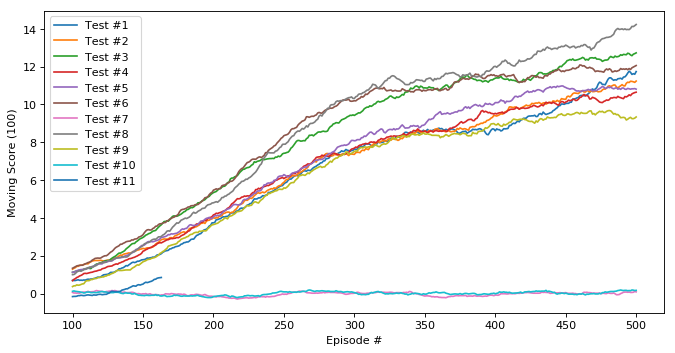

In [12]:
plot_scores(scores)

In [13]:
scores